In [31]:
pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install jupyterlab "ipywidgets>=7.6"

  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.10.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached babel-2.16.

# Natural Language Processing with Disaster Tweets

#### course: Fundamentals of Datascience (CSC 6780)
#### Group Members:
- Fiyinfoluwa Dideoluwa (002828214)
- Amirthavarshani Mahadevan (002847245)
- Shiva Madhav Adusumilli (002775471)
- Milaan Williams (002661017)
- Jarvis Chapman (002180520)
- Flynn Heise (002611186)



## Objective


Social media has become an important communication channel for staying up to date on critical events such as disasters. However; the sheer magnitude and diversity of posts it is hard to tell what is real. Platforms like Twitter, Instagram, and Facebook play crucial roles in circulating both essential and distracting information during disasters. Accurate classification of such information can help streamline emergency response efforts. This project utilizes a labeled dataset of tweets to build and evaluate effective models capable of performing this classification task. 


## Steps:
1. **Exploratory Data Analysis**
2. **Data Preprocessing**
4. **Evaluation of Machine Learning models for classifying Tweets data**
    - Decision Tree
    - Random Forest
    - Logistics Regression
    - SVM
5. **Deep Learning approach for classifying Tweets data**
    - Multi Channel CNN
    - RNN with LSTM
6. **Analysis and Discussion**

In [1]:
# install necessary Libraries
!pip install --upgrade scikit-learn
!pip install tensorflow
!pip install nltk
!pip install wordcloud
!pip install chart-studio
!pip install cufflinks
!pip install keras
!pip install sentence-transformers
!pip install torch
!pip install transformers

/Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/FDS_Project/projectEnv/bin/pip: line 2: /Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/projectEnv/bin/python: No such file or directory
/Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/FDS_Project/projectEnv/bin/pip: line 2: exec: /Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/projectEnv/bin/python: cannot execute: No such file or directory
/Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/FDS_Project/projectEnv/bin/pip: line 2: /Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/projectEnv/bin/python: No such file or directory
/Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/FDS_Project/projectEnv/bin/pip: line 2: exec: /Users/amirthavarshanimahadevan/Documents/GSU/Fundamental of DS/Project/projectEnv/bin/python: cannot execute: No such file or directory
/Users/amirthavarshanima

In [27]:
# import the required dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#libraries for NLP
import nltk
import re
from nltk.corpus import stopwords
from plotly.subplots import make_subplots
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import nltk
nltk.download ('stopwords')

import plotly
import plotly.graph_objs as go
import torch
import plotly.figure_factory as ff
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirthavarshanimahadevan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 1. Data Exploration

In [2]:
# Load the dataset
df = pd.read_csv('Data/train.csv')

### A. Explore the structure of the dataset

In [3]:
# view the first 10 records of the data
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
# display concise summarization of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# generate descriptive statistics of the data
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### B. Check for Missing Data

In [6]:

# Identify columns with missing values and the percentage of missing data in each column
def check_missing_values(dataframe):
    print("\nMissing Values Report:")
    # finds the sum of missing values in each column
    missing_values = dataframe.isnull().sum()
    
    # calculates the percentage of missing values in each column and prints the report
    missing_percentage = (missing_values / len(df)) * 100
    missing_report = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percentage
    })
    #display the report
    display(missing_report[missing_report['Missing Values'] > 0])
    
check_missing_values(df)


Missing Values Report:


,Missing Values,Percentage (%)
keyword,61,0.801261
location,2533,33.272035


### C. Feature Engineering

#### We do not need the 'location' feature, so we drop it

In [7]:
#drop 'location'
cleaned_df = df.drop(columns=['location', 'id'])

#### Since the percentage of missing values in the 'keywords' column is very minimal (<1%), we will handle this by deleting the records that contain these null values.

In [8]:
# Drop rows where 'keyword' has null values
df_cleaned = cleaned_df.dropna(subset=['keyword'])

In [9]:
# confirm there are no missing values
check_missing_values(df_cleaned)


Missing Values Report:


,Missing Values,Percentage (%)


### D. Visualize the Distribution of the Dataset

In [11]:
# plot a bar chart to show the distribution of the tatget varoiable
fig = px.bar(x=["0","1"], y=df_cleaned["target"].value_counts(),color=["red", "red"])

#Change this value for bar widths
for dt in fig.data:
    dt["width"] = 0.4 

fig.update_layout(
    title_text = "Counts for Disaster and Non-Disaster Tweets",
    title_x=0.5,
    width=800,
    height=550,
    xaxis_title="Targets",
    yaxis_title="Count",
    showlegend=False
).show()

# Show the figure
#fig.show()


#### The plot shows our dataset is quite balanced, where:
Target = 1, represents disaster tweets, and
Target = 2, represents non-disaster tweets


### E. Visualize length of tweets 


In [12]:
# plot the histograms for the length of words in each tweet for both target categories
word_len_dis = df_cleaned[df_cleaned['target']==1]['text'].str.split().map(lambda x : len(x))

word_len_non_dis = df_cleaned[df_cleaned['target']==0]['text'].str.split().map(lambda x : len(x))

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
            go.Histogram(x=word_len_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=1
).add_trace(
            go.Histogram(x=word_len_non_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=2
).update_layout(title_text="Length of words in Tweets",title_x=0.5,showlegend=False).show()

#### The plots have the shape of a normal distribution. From the plot we can say that the number of words in the tweets ranges from 2 to 30 in both cases

### F. Visualize most common stop words in the text data

#### What is a corpus?
A corpus, which means "body" in Latin, is a group of writings used in linguistics and natural language processing.
These collections can consist of texts in one language or a variety of languages.


In [13]:
def create_corpus(target):
    corpus = []
    for i in df_cleaned[df_cleaned['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

#### What are stop words?
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

In [14]:
# displays the top 10 stop words in tweets where the occurs the most in both groups
values_list = []

def analyze_stopwords(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        dic[word] += 1
    
    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(df_cleaned,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[1],y=values_list[0],orientation='h',marker=dict(color= 'rgba(152, 255, 74,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[3],y=values_list[2],orientation='h',marker=dict(color= 'rgba(255, 143, 92,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top stop words in the text",title_x=0.5,showlegend=False).show()

### G. Visualize most common punctuations/ special characters in the text data

In [15]:
# Anaysing Punctuations
from string import punctuation
values_list = []
def analyze_punctuations(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        if word in punctuation:
            dic[word] += 1 
    x_items, y_values = zip(*dic.items())
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing punctuations for 0 and 1 target labels
analyze_punctuations(df_cleaned,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[0],y=values_list[1],
             marker=dict(color= 'rgba(196, 94, 255,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[2],y=values_list[3],
             marker=dict(color= 'rgba(255, 163, 102,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top Punctuations/Special Characters in the text",title_x=0.5,showlegend=False).show()

## Step 2. Data Preprocessing

### A. Remove unwanted text using regular expressions

#### What is stemming?
Stemming is a technique that removes prefixes and suffixes from words to return them to their fundamental or root form. The primary goal of stemming is to standardise and simplify words.

In [16]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

df_cleaned["Cleaned_text"] = df_cleaned["text"].apply(preprocess_data)

### B. Further Data Exploration

In [17]:
# Visualize words using wordcloud
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()
    
data_disaster = df_cleaned[df_cleaned['target'] == 1]
data_non_disaster = df_cleaned[df_cleaned['target'] == 0]

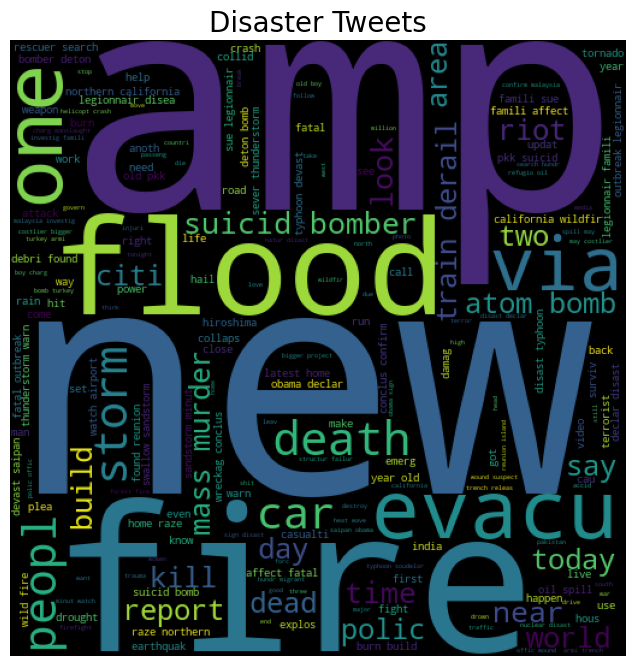

In [18]:
# display wordcloud for disaster tweets
wordcloud(data_disaster,"Disaster Tweets")

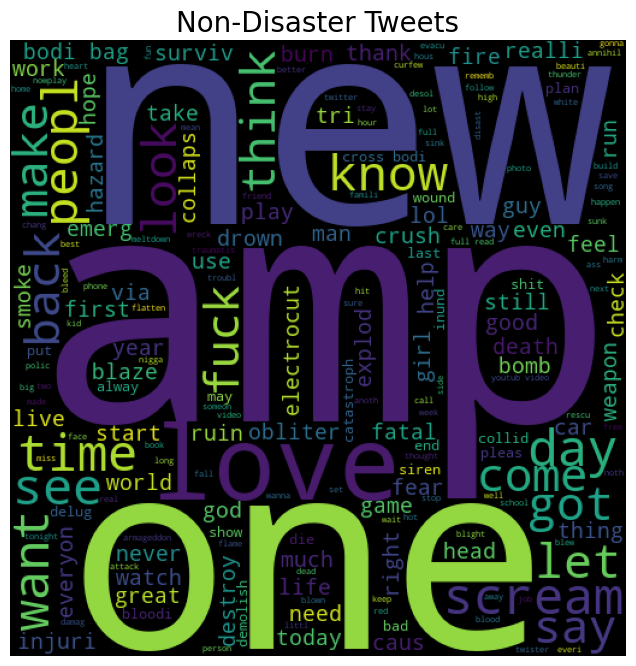

In [20]:
# display wordcloud for non-disaster tweets
wordcloud(data_non_disaster,"Non-Disaster Tweets")

#### Our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model, resulting in false prediction. Now, we will further remove some words with high frequency from text based on above charts.

In [19]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

df_cleaned["Cleaned_text"] = df_cleaned["Cleaned_text"].apply(text_cleaning)

# Step 3. Model Training and Evaluation 

### A. Word Embedding Using BERT

BERT - Bidirectional Encoder Representations from Transformers
BERT stands for Bidirectional Encoder Representations from Transformers. It is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks.

The best part about BERT is that we can use the BERT models to extract high quality language features from our text data.

In [21]:
# load bert model
from transformers import AutoTokenizer, AutoModel

In [22]:
# Load BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [23]:
# Function to compute BERT embeddings for a batch of texts
def get_bert_embeddings_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Average the last hidden state to get fixed-length vectors
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    return embeddings

# Process 'text' and 'keyword' columns in batches
batch_size = 32  # Adjust based on your system's memory
text_embeddings = []
keyword_embeddings = []

for i in range(0, len(df_cleaned), batch_size):
    # Batch processing for 'text'
    batch_texts = df_cleaned['text'].iloc[i:i + batch_size].tolist()
    text_embeddings.extend(get_bert_embeddings_batch(batch_texts))
    
    # Batch processing for 'keyword'
    batch_keywords = df_cleaned['keyword'].iloc[i:i + batch_size].tolist()
    keyword_embeddings.extend(get_bert_embeddings_batch(batch_keywords))

# Add embeddings back to the DataFrame
df_cleaned['text_embedding'] = text_embeddings
df_cleaned['keyword_embedding'] = keyword_embeddings

In [24]:
# Combine embeddings into a single feature matrix
X = np.hstack([np.stack(df_cleaned['text_embedding'].values), np.stack(df_cleaned['keyword_embedding'].values)])
y = df_cleaned['target'].values  # Assuming 'target' is your label column

### B. Model Building

In [25]:
# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# instantiate the machine learning models
models = {
    'Logistic Regression': LogisticRegression(solver='saga', random_state=0),
    'SVM': SVC(C=1,kernel='rbf', gamma='scale',random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
}

# Train the models
for name, model in models.items():
    # Train the models
    model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='saga')

SVC(C=1, random_state=0)

RandomForestClassifier(n_estimators=200)

DecisionTreeClassifier(max_depth=5, random_state=0)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Model Accuracies')

([0, 1, 2, 3],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Decision Tree')])

(0.0, 1.0)

Text(0.0, 0.8186231244483672, '81.86%')

Text(1.0, 0.824360105913504, '82.44%')

Text(2.0, 0.8106796116504854, '81.07%')

Text(3.0, 0.7427184466019418, '74.27%')

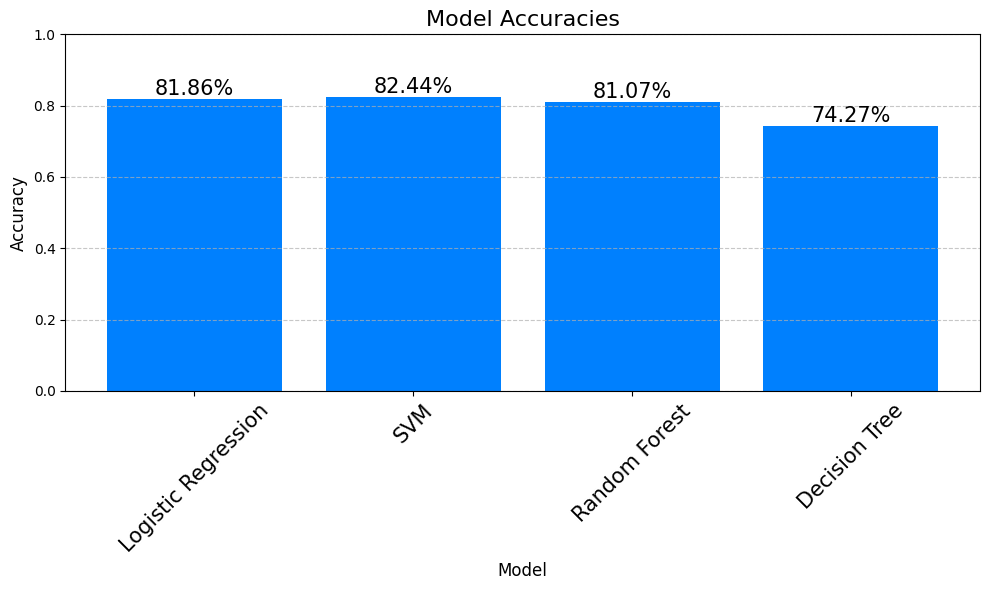

In [39]:

# Dictionary to store model accuracies
model_accuracies = {}

# Calculate accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Plot the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color='#0080FE')  # Nice blue color
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracies', fontsize=16)
plt.xticks(rotation=45, fontsize=15)
plt.ylim(0, 1)  # Assuming accuracy ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage text on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height,  # Height of the bar
        f'{height*100:.2f}%',  # Format as percentage
        ha='center', va='bottom', fontsize=15, color='black'
    )

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Model F1 Scores')

([0, 1, 2, 3],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Decision Tree')])

(0.0, 1.0)

Text(0.0, 0.7791509940891993, '77.92%')

Text(1.0, 0.7820372398685652, '78.20%')

Text(2.0, 0.7572156196943973, '75.72%')

Text(3.0, 0.6726558113419427, '67.27%')

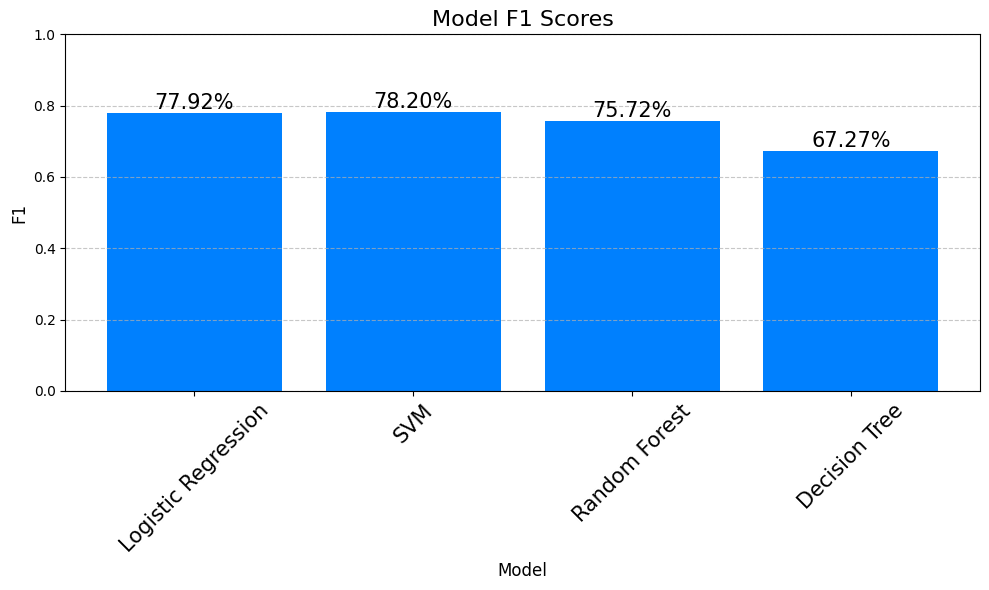

In [44]:

# Dictionary to store model f1-score
model_F1 = {}

# Calculate F1 for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    model_F1[name] = f1

# Plot the F1
plt.figure(figsize=(10, 6))
bars = plt.bar(model_F1.keys(), model_F1.values(), color='#0080FE')  # Nice blue color
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1', fontsize=12)
plt.title('Model F1 Scores', fontsize=16)
plt.xticks(rotation=45, fontsize=15)
plt.ylim(0, 1)  # Assuming accuracy ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage text on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height,  # Height of the bar
        f'{height*100:.2f}%',  # Format as percentage
        ha='center', va='bottom', fontsize=15, color='black'
    )

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
# display the accuracy for each model
for name, model in models.items():
     # Predict and evaluate the models
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression Accuracy: 0.8186231244483672
SVM Accuracy: 0.824360105913504
Random Forest Accuracy: 0.8106796116504854
Decision Tree Accuracy: 0.7427184466019418


In [ ]:
# display the f1 for each model
for name, model in models.items():
     # Predict and evaluate the models
    y_pred = model.predict(X_test)
    print(f"{name} F1 score: {f1_score(y_test, y_pred)}")

Logistic Regression F1 score: 0.7791509940891993
SVM F1 score: 0.7820372398685652
Random Forest F1 score: 0.7463026166097838
Decision Tree F1 score: 0.6726558113419427


In [42]:
# create and print classification report for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1302
           1       0.81      0.75      0.78       964

    accuracy                           0.82      2266
   macro avg       0.82      0.81      0.81      2266
weighted avg       0.82      0.82      0.82      2266

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1302
           1       0.83      0.74      0.78       964

    accuracy                           0.82      2266
   macro avg       0.83      0.81      0.82      2266
weighted avg       0.82      0.82      0.82      2266

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84      1302
           1       0.83      0.69      0.76       964

    accuracy                           0.81      2266
   mac

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Logistic Regression')

Text(45.722222222222214, 0.5, 'Actual Class')

Text(0.5, 14.722222222222216, 'Predicted Class')

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'SVM')

Text(45.722222222222214, 0.5, 'Actual Class')

Text(0.5, 14.722222222222216, 'Predicted Class')

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest')

Text(45.722222222222214, 0.5, 'Actual Class')

Text(0.5, 14.722222222222216, 'Predicted Class')

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Decision Tree')

Text(45.722222222222214, 0.5, 'Actual Class')

Text(0.5, 14.722222222222216, 'Predicted Class')

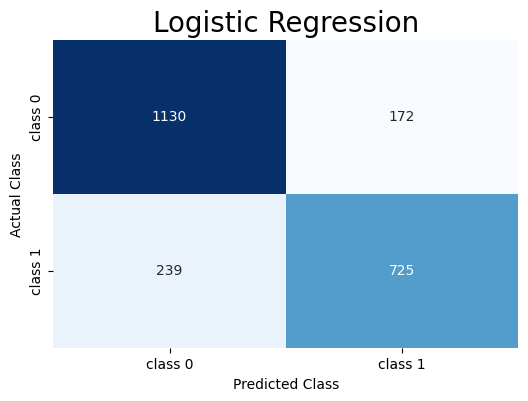

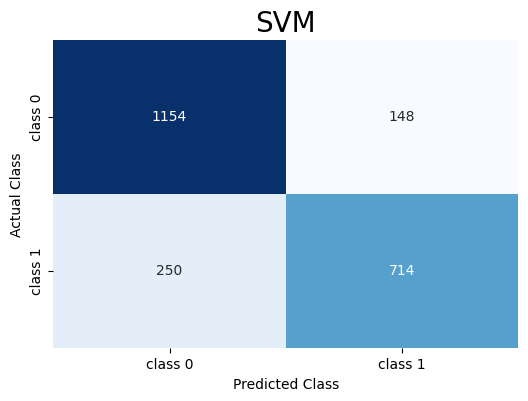

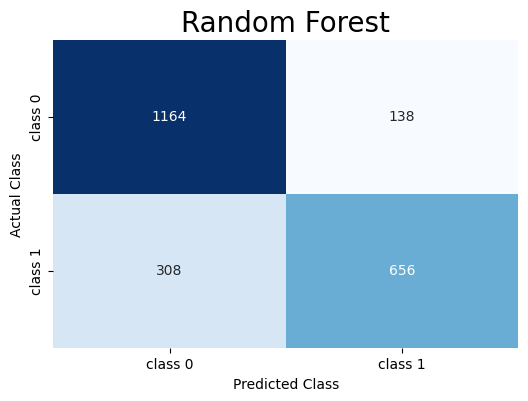

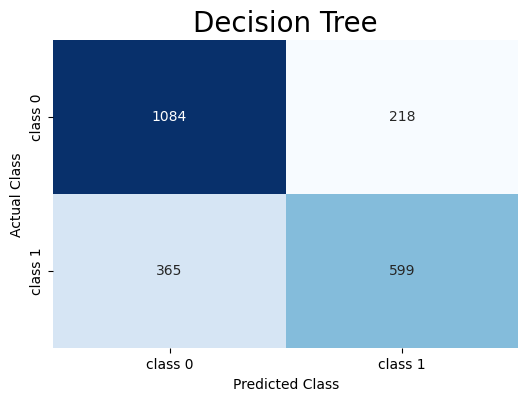

In [34]:
# Plot the Confusion Matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["class 0", "class 1"], 
                yticklabels=["class 0", "class 1"])
    
    plt.title(name, fontsize=20)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

# Step 4. Deep Learning approach for classifying Tweets data

### A.  Multi Channel CNN Model

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Embedding, Conv1D, GlobalMaxPooling1D, concatenate,LSTM, Dense, Dropout, Bidirectional
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

In [45]:
# Tokenization and Padding
max_words = 20000
max_len = 100
embedding_dim = 128  # Embedding dimension for trainable embeddings

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_cleaned['text'].tolist())

X = tokenizer.texts_to_sequences(df_cleaned['text'])
X = pad_sequences(X, maxlen=max_len)
y = df_cleaned['target']

test_sequences = tokenizer.texts_to_sequences(df_cleaned['text'])
test_padded = pad_sequences(test_sequences, maxlen=max_len)

# Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Custom Callback to Compute F1-Score During Training
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred_prob = self.model.predict(X_val).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)
        f1 = f1_score(y_val, y_pred)
        self.f1_scores.append(f1)
        print(f"Epoch {epoch + 1} F1-Score: {f1:.4f}")

In [47]:
# Hyperparameters
filters = 256
kernel_sizes = [3, 5, 7]
dropout_rate = 0.75
learning_rate = 0.00005
batch_size = 32
epochs = 10

# Build the Multi-Channel CNN Model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(input_layer)


In [48]:
# Convolutional layers with multiple kernel sizes
conv_blocks = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
    pool = GlobalMaxPooling1D()(conv)
    conv_blocks.append(pool)

# Concatenate pooled outputs
concat = concatenate(conv_blocks)

# Fully connected layers
dense1 = Dense(128, activation='relu')(concat)
dropout = Dropout(dropout_rate)(dense1)
output_layer = Dense(1, activation='sigmoid')(dropout)

# Define and Compile the Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping and F1-score callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
f1_callback = F1ScoreCallback(validation_data=(X_valid, y_valid))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 128)  │  2,560,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 98, 256)   │     98,560 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 96, 256)   │    164,096 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 94, 256)   │    229,632 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,150,849 (12.02 MB)

 Trainable params: 3,150,849 (12.02 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, f1_callback],
    verbose=1
)



Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Epoch 1 F1-Score: 0.0000
166/166 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.5516 - loss: 0.6857 - val_accuracy: 0.5746 - val_loss: 0.6756
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 2 F1-Score: 0.0306
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.5814 - loss: 0.6740 - val_accuracy: 0.5812 - val_loss: 0.6624
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 3 F1-Score: 0.5948
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.6260 - loss: 0.6522 - val_accuracy: 0.6584 - val_loss: 0.6454
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 4 F1-Score: 0.6006
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.6764 - loss: 0.6277 - val_accuracy: 0.6620 - val_loss: 0.6262
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 5 F1-Score: 0.6202
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.6927 - loss: 0.6023 - val_accuracy: 0.7043 - val_loss: 0.6029
Epoch 6/10
71/71 ━━━━━━━━

In [ ]:
# Evaluate the Model
y_pred_prob = model.predict(X_valid).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

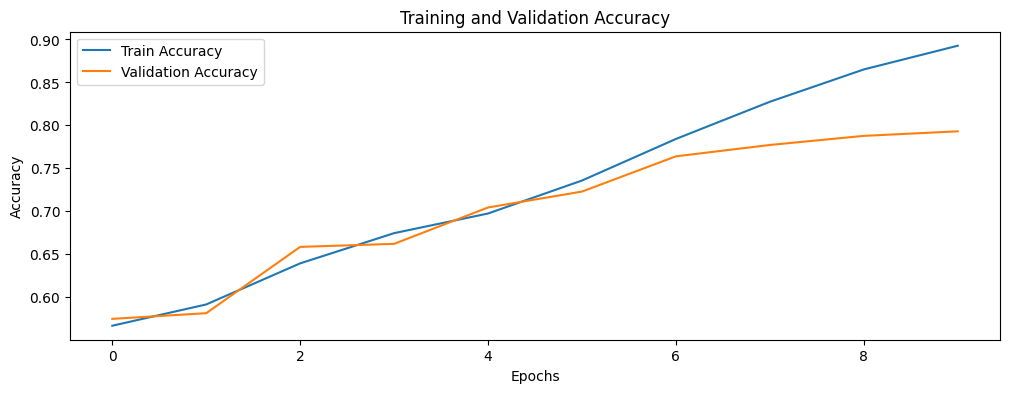

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training and Validation Loss')

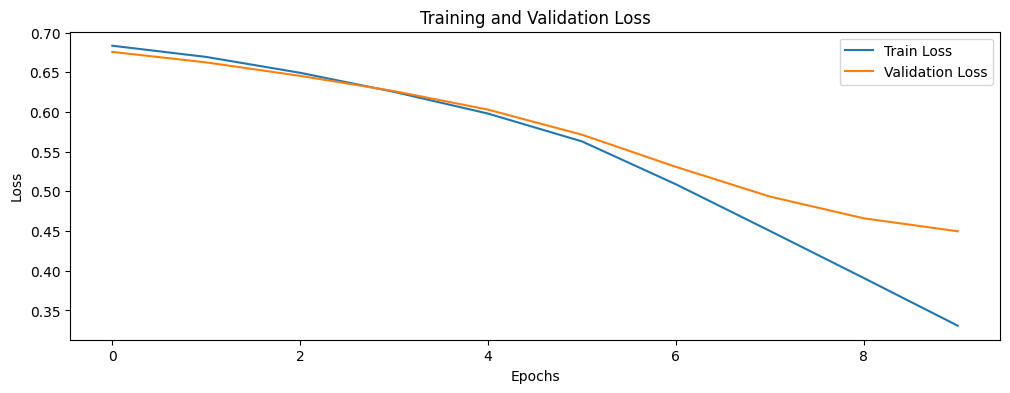

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'Validation F1-Score per Epoch')

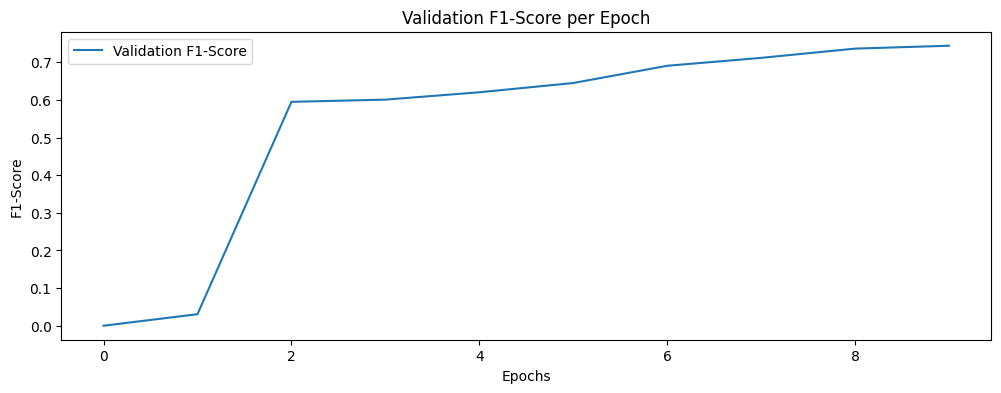

In [50]:
# Plot Training History (Accuracy, Loss, and F1-Score)
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(f1_callback.f1_scores, label='Validation F1-Score')
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.legend()
plt.title("Validation F1-Score per Epoch")
plt.show()

### B. RNN with LSTM

In [52]:
# Refined Hyperparameters
MAX_WORDS = 20000         # Maximum number of words in the vocabulary
MAX_LEN = 100             # Maximum length of input sequences
EMBEDDING_DIM = 128       # Dimensionality of the embedding layer
LSTM_UNITS_1 = 64         # Reduced units in the first LSTM layer
LSTM_UNITS_2 = 32         # Reduced units in the second LSTM layer
DENSE_UNITS = 32          # Reduced units in the dense layer
DROPOUT_RATE = 0.70        # Increased dropout rate for regularization
LEARNING_RATE = 0.00007    # Reduced learning rate for finer updates
BATCH_SIZE = 32           # Batch size for training
EPOCHS = 5                # Number of training epochs
EARLY_STOPPING_PATIENCE = 2  # Early stopping patience to prevent overfitting

In [61]:
# Build the Refined RNN with LSTM Model
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(LSTM_UNITS_1, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(LSTM(LSTM_UNITS_2, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(DENSE_UNITS, activation='relu', kernel_regularizer=l2(0.01)))  # Added L2 regularization
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the Model
model.summary()

# Early stopping and F1-score callback
early_stopping = EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, restore_best_weights=True)
f1_callback = F1ScoreCallback(validation_data=(X_valid, y_valid))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, f1_callback],
    verbose=1
)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Epoch 1 F1-Score: 0.0000
166/166 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.5727 - loss: 1.0939 - val_accuracy: 0.5746 - val_loss: 1.0496
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 2 F1-Score: 0.0000
166/166 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5713 - loss: 1.0396 - val_accuracy: 0.5746 - val_loss: 1.0000
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 3 F1-Score: 0.0000
166/166 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.5793 - loss: 0.9861 - val_accuracy: 0.5746 - val_loss: 0.9510
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Epoch 4 F1-Score: 0.2730
166/166 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.5817 - loss: 0.9358 - val_accuracy: 0.6192 - val_loss: 0.8941
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Epoch 5 F1-Score: 0.5848
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6344 - loss: 0.8813 - val_accuracy: 0.6942 - val_loss: 0.8371


In [63]:
# Evaluate the Model
y_pred_prob = model.predict(X_valid).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1302
           1       0.69      0.51      0.58       964

    accuracy                           0.69      2266
   macro avg       0.69      0.67      0.67      2266
weighted avg       0.69      0.69      0.68      2266



<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

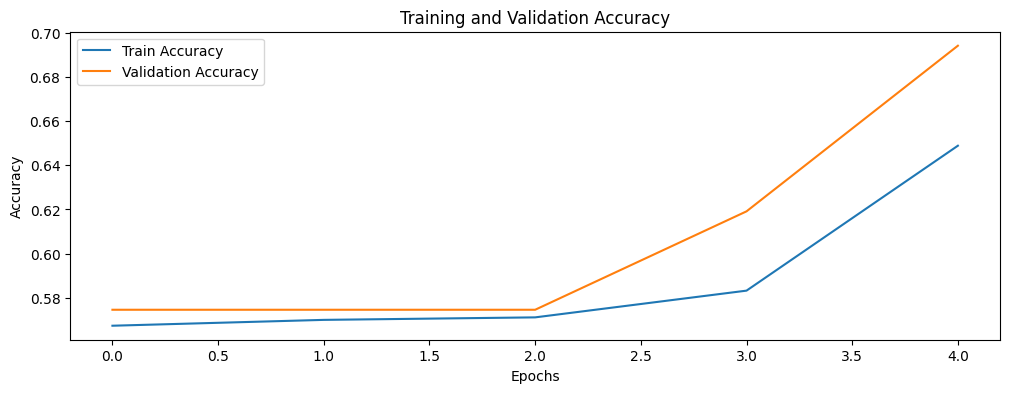

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training and Validation Loss')

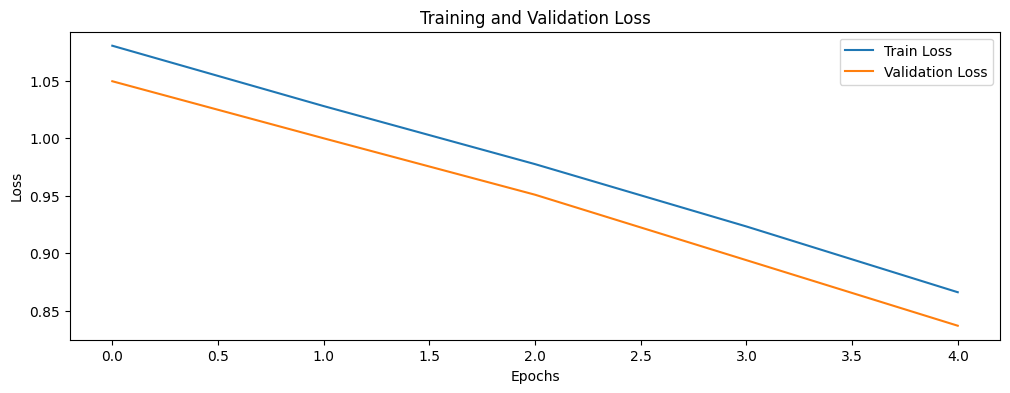

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'Validation F1-Score per Epoch')

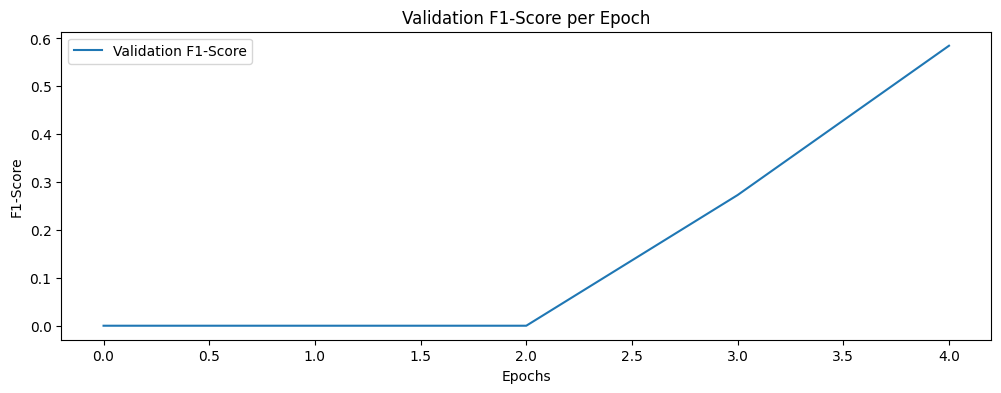

In [65]:
# Plot Training History (Accuracy, Loss, and F1-Score)
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(f1_callback.f1_scores, label='Validation F1-Score')
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.legend()
plt.title("Validation F1-Score per Epoch")
plt.show()

# Step 5. Analysis and Discussion

#### Of the 4 traditional machine learning algorithms that were used, the Support Vector Machine (SVM) algorithm performed best. Below is the ranking of their performance based on the 'accuracy' evaluation metric in descending order:
1. SVM - 82.4%
2. Logistic Regression - 81.8%
3. Random Forest - 81.0%
4. Decision Tree - 74.2%

#### Multi-Channel CNN : The model was trained with the hyperparameter shown below. An average F1 score of  0.785 and accuracy of 79% was obtained.

#### RNN with LSTM : The model was trained with the hyperparameter shown below. An average F1 score of  0.67 and accuracy of 69% was obtained.